# Model validation

#### BTC-USDT for ROR_n24 with price action features


<br>

#### Performance by Model ID

```
model_id: 1a198235336cc9cd417004b752cc80ffdf7b2705
    - n_estimates = 500
    - max_depth = 10
    - Mean Absolute Error: 0.0043
    - Mean Absolute Outcome: 0.02299
    - Mean Absolute Percent Error: 0.18687
    - Error Variance: 9e-05
    - R-Squared: 0.93091
```

<br>

#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [2]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [3]:
# Load model data
data = dataObject("""
SELECT * EXCEPT(load_rank)
FROM (
  SELECT
  RANK() OVER (PARTITION BY ticker_time ORDER BY etl_time) AS load_rank,
  * EXCEPT(
    conversionType, conversionSymbol,
    LAG1_open, LAG1_high, LAG1_low, LAG1_close,
    LAG2_open, LAG2_high, LAG2_low, LAG2_close,
    LAG3_open, LAG3_high, LAG3_low, LAG3_close,
    LAG4_open, LAG4_high, LAG4_low, LAG4_close,
    LAG5_open, LAG5_high, LAG5_low, LAG5_close,
    LAG6_open, LAG6_high, LAG6_low, LAG6_close,
    LAG7_open, LAG7_high, LAG7_low, LAG7_close,
    LAG8_open, LAG8_high, LAG8_low, LAG8_close,
    LAG9_open, LAG9_high, LAG9_low, LAG9_close,
    LAG10_open, LAG10_high, LAG10_low, LAG10_close,
    LAG11_open, LAG11_high, LAG11_low, LAG11_close,
    LAG12_open, LAG12_high, LAG12_low, LAG12_close,
    LAG13_open, LAG13_high, LAG13_low, LAG13_close,
    LAG14_open, LAG14_high, LAG14_low, LAG14_close,
    LAG15_open, LAG15_high, LAG15_low, LAG15_close,
    LAG16_open, LAG16_high, LAG16_low, LAG16_close,
    LAG17_open, LAG17_high, LAG17_low, LAG17_close,
    LAG18_open, LAG18_high, LAG18_low, LAG18_close,
    LAG19_open, LAG19_high, LAG19_low, LAG19_close,
    LAG20_open, LAG20_high, LAG20_low, LAG20_close,
    LAG21_open, LAG21_high, LAG21_low, LAG21_close,
    LAG22_open, LAG22_high, LAG22_low, LAG22_close,
    LAG23_open, LAG23_high, LAG23_low, LAG23_close,
    LAG24_open, LAG24_high, LAG24_low, LAG24_close
    )
  FROM `algom-trading.train_features.features_BTC_USDT_hour_i03_20200101`
  WHERE 
    year = 2020
    AND LAG24_close > 0
)
WHERE load_rank = 1
ORDER BY ticker_time
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 8784/8784 [00:11<00:00, 738.96rows/s]

SUCCESS: Loaded SQL query.


In [4]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

8713


,ticker_time_sec,close,high,low,open,volume_base,volume,partition_date,etl_time,ticker_time,...,open_low21,open_close22,open_high22,open_low22,open_close23,open_high23,open_low23,open_close24,open_high24,open_low24
0,1577836800,7177.02,7196.25,7175.46,7195.23,480.93,3453949.34,2021-01-03,2021-01-03 21:31:02.826911+00:00,2020-01-01 00:00:00+00:00,...,0.001235,0.001235,0.001236,0.001235,0.001236,0.001236,0.001235,0.001235,0.001235,0.001234
1,1577840400,7216.27,7230.00,7175.71,7177.02,836.51,6030300.92,2021-01-03,2021-01-03 21:31:02.826911+00:00,2020-01-01 01:00:00+00:00,...,0.001238,0.001238,0.001239,0.001238,0.001238,0.001239,0.001238,0.001239,0.001239,0.001238
2,1577844000,7242.85,7244.87,7211.41,7216.27,626.60,4530216.13,2021-01-03,2021-01-03 21:31:02.826911+00:00,2020-01-01 02:00:00+00:00,...,0.001232,0.001232,0.001232,0.001231,0.001232,0.001232,0.001231,0.001232,0.001232,0.001231
3,1577847600,7225.01,7245.00,7220.00,7242.85,748.76,5414508.65,2021-01-03,2021-01-03 21:31:02.826911+00:00,2020-01-01 03:00:00+00:00,...,0.001227,0.001228,0.001228,0.001227,0.001227,0.001227,0.001227,0.001227,0.001227,0.001227
4,1577851200,7217.27,7230.00,7215.03,7225.01,442.09,3193315.81,2021-01-03,2021-01-03 21:31:02.826911+00:00,2020-01-01 04:00:00+00:00,...,0.001230,0.001230,0.001231,0.001230,0.001231,0.001231,0.001230,0.001230,0.001231,0.001230


<br>

### Initialize modelRegression class

In [5]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n24',
    model_id='2aeb39446969312548b8c5ef57d92a63bea44184',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES,
    to_bq=True
)

SUCCESS: Loaded dataObject.
SUCCESS: Model 2aeb39446969312548b8c5ef57d92a63bea44184 has been loaded successfully.
Downloaded file from GCS to: /home/jovyan/algomosaic/data/models/20210105_GradientBoostingRegressor_2aeb39446969312548b8c5ef57d92a63bea44184.pickle
Initialized model. As a next step, run self.predict() or self.train().


In [6]:
# len(model.feature_list)
# list(model.feature_list)


In [7]:
# Train model
model.predict()


Model metadata added to `self.metadata.metadata`
SUCCESS: Loaded DataFrame.


1it [00:03,  3.29s/it]


Model metadata added to `self.metadata.parameters`
SUCCESS: Loaded DataFrame.


1it [00:03,  3.39s/it]


Get model performance.
Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mean_abs_error
                - self.mean_abs_outcome
                - self.mean_abs_pct_error
                - self.error_var
            
Performance metrics added to `self.performance`

MODEL PERFORMANCE SUMMARY
        - Mean Absolute Error:	 0.03551
        - Mean Absolute Outcome:	 0.02289
        - Mean Absolute Percent Error:	 1.55135
        - Error Variance:	 0.00255
        - R-Squared:		 -0.83858
        
PLOT PREDICTIONS: Use the following commandsto view model performance.
              `self.plot_predictions_by_date(start_date, end_date)`
              `self.plot_predictions_histogram(start_date, end_date)`
              `self.plot_errors_by_date(start_date, end_date)`
              `self.plot_errors_histogram(start_date, end_date)`
              `self.plot_predictions_scatterplot(start_date, end_date)`
              
SUCCESS: Loaded DataFrame.


1it [00:08,  8.21s/it]


In [8]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


model_id: 2aeb39446969312548b8c5ef57d92a63bea44184
model_execution_id: 4aa4ed3b597d61c1afc9bf8e6b7f994e4c6eb70a


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [19]:
start_date='2020-04-01'
end_date='2020-04-15'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


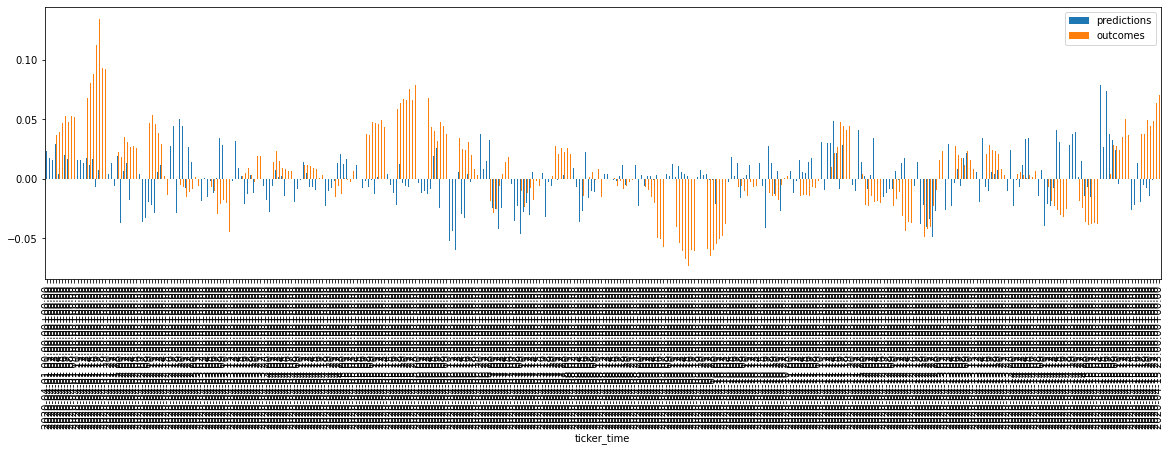

In [20]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


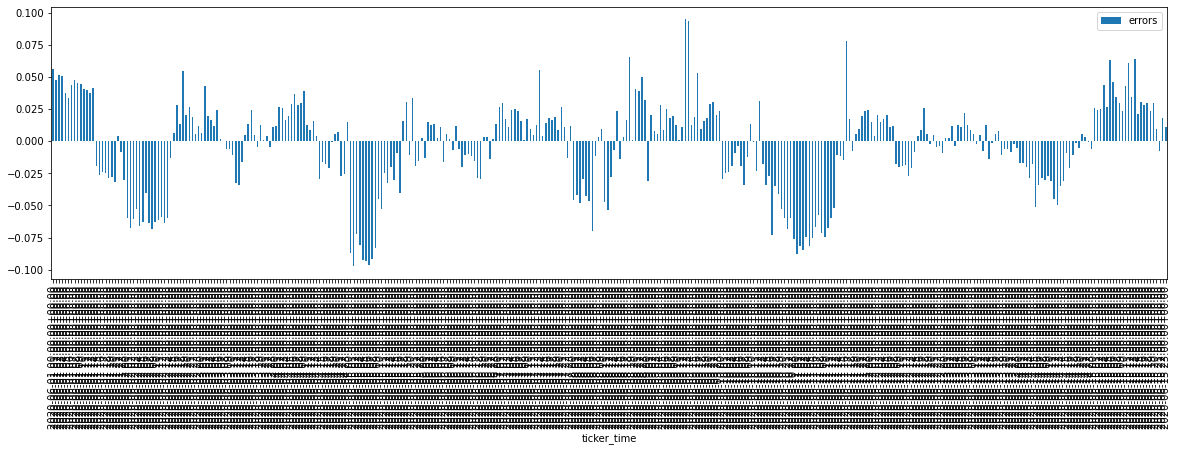

In [18]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


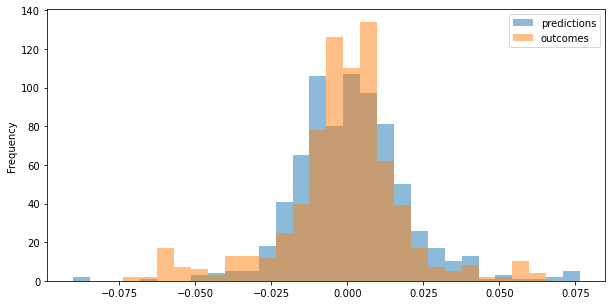

In [12]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


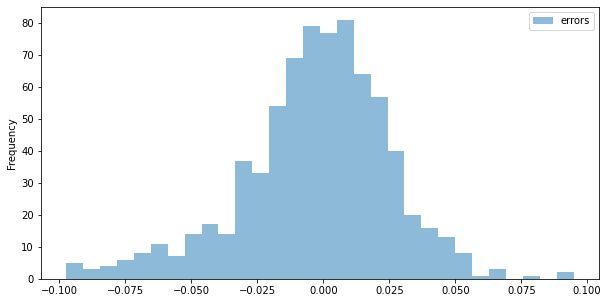

In [13]:
model_plot.plot_errors_histogram(start_date, end_date)

PLOT: Predictions by Date


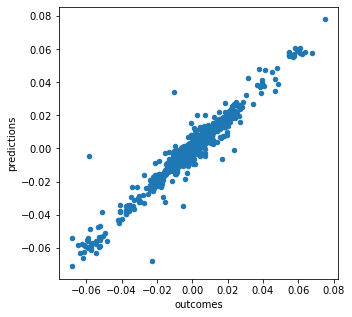

In [21]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### Most important features


In [32]:
features = model.feature_importance.feature_importance
features[0:30]


,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
0,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_close1,0.30463,1.0,1.000000
1,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_high6,0.06002,2.0,0.944444
2,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low6,0.05763,3.0,0.888889
3,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low1,0.05286,4.0,0.833333
4,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low2,0.04559,5.0,0.777778
5,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_high5,0.04491,6.0,0.722222
6,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low5,0.04481,7.0,0.666667
7,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_low3,0.04133,8.0,0.611111
8,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_high1,0.03966,9.0,0.555556
9,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_close6,0.03827,10.0,0.500000


<br>

### Least import features

In [33]:
features[len(features)-20:len(features)]

,model_execution_id,data_id,outcome_variable,variable,importance,rank,pct_rank
16,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_close2,0.03202,17.0,0.111111
17,8a992ab5ae501da51c16a46403ee4bc349950b2a,6eef6648406c333a4035cd5e60d0bf2ecf2606d7,ROR_n24,open_close4,0.03145,18.0,0.055556


<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
